In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Packages

In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Read Dataset

In [ ]:
dataset=pd.read_csv('/kaggle/input/mushroom-dataset/mushroom_cleaned.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

In [ ]:
## print the top5 records
dataset.head()

In [ ]:
dataset.info()

In [ ]:
# Verifying data types and integrity
print("\nData Types:")
print(dataset.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(dataset.describe())

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['Recurred']=le.fit_transform(dataset['Recurred'])
Recurred_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
Recurred_name_mapping

In [ ]:
pd.DataFrame(Recurred_name_mapping.items())

In [ ]:
dataset.head()

# EDA
## Missing features

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

No Missing Feature

## Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

In [ ]:
dataset.describe()

## Temporal Variables(Eg: Datetime Variables)

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

## Numerical variables are usually of 2 type
## 1. Discrete Features and Continous Features

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
discrete_feature

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers In Numerical Feature

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical Features

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

In [ ]:
dataset[categorical_features].head()

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Recurred'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Recurred')
    plt.title(feature)
    plt.show()

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# dataset['NObeyesdad']=le.fit_transform(dataset['NObeyesdad'])
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# le_name_mapping

In [ ]:

le_cat_name=dict()
cat_le = preprocessing.LabelEncoder()
for i in categorical_features:
    dataset[i]=cat_le.fit_transform(dataset[i])
    le_cat_name[i] = dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

In [ ]:
pd.DataFrame(le_cat_name.items())

In [ ]:
dataset.head()

# Feature Slection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
## Capture the dependent feature
X=dataset.drop(['Recurred'],axis=1)
y=dataset[['Recurred']]

In [ ]:
X.shape,y.shape

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

In [ ]:
feature_sel_model.get_support()

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

In [ ]:
selected_feat

In [ ]:
#X=X[selected_feat]

In [ ]:
X.head()

In [ ]:
sns.heatmap(X.corr())

In [ ]:
X.head()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,
                             precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score)

In [ ]:
models={
    "Decison Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":xgb.XGBClassifier(objective="binary:logistic", random_state=42),
    "GradientBoost":GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "AdaBoost":AdaBoostClassifier(n_estimators=100, random_state=0),
    "CatBoost":CatBoostClassifier(learning_rate= 0.1, depth=6, l2_leaf_reg= 3, iterations= 100)
    
}

In [ ]:
!pip install dagshub
!pip install mlflow

In [ ]:
import dagshub
dagshub.init(repo_owner='SunilKumar-ugra', repo_name='Thyroid-Cancer-Recurrence-Prediction', mlflow=True)

In [ ]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction.mlflow")
mlflow.set_experiment("Thyroid Cancer Recurrence Prediction")

In [ ]:
def classification_performace_matric(actual, pred,avg):
        acc=accuracy_score(actual,pred)
        f1=f1_score(actual,pred,average=avg)
        precission=precision_score(actual,pred,average=avg)
        recall=recall_score(actual,pred,average=avg)
        return acc,f1,precission,recall

In [ ]:
mlflow.sklearn.autolog(disable=True)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    
    with mlflow.start_run(run_name=str(model_name)):
        mlflow.set_tag("model_name", str(model_name))
        
        model.fit(X_train,y_train)
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
        
        
        #training   performance
        (trn_acc,trn_f1,trn_precission,trn_recall)=classification_performace_matric(y_train,y_train_pred,'weighted')
        
        #testing   performance
        (tst_acc,tst_f1,tst_precission,tst_recall)=classification_performace_matric(y_test,y_test_pred,'weighted')
        
        
        
        #train performance log
        
        mlflow.log_metric("Train Accuracy", trn_acc)
        mlflow.log_metric("Train F1 Score",trn_f1)
        mlflow.log_metric("Train Precision",trn_precission)
        mlflow.log_metric("Train Recall",trn_recall)
        
        # test performance log
        
        mlflow.log_metric("Test Accuracy", tst_acc)
        mlflow.log_metric("Test F1 Score",tst_f1)
        mlflow.log_metric("Test Precision",tst_precission)
        mlflow.log_metric("Test Recall",tst_recall)
        
        #Model log
        mlflow.sklearn.log_model(model, str(model_name)+"_model")

# Result

[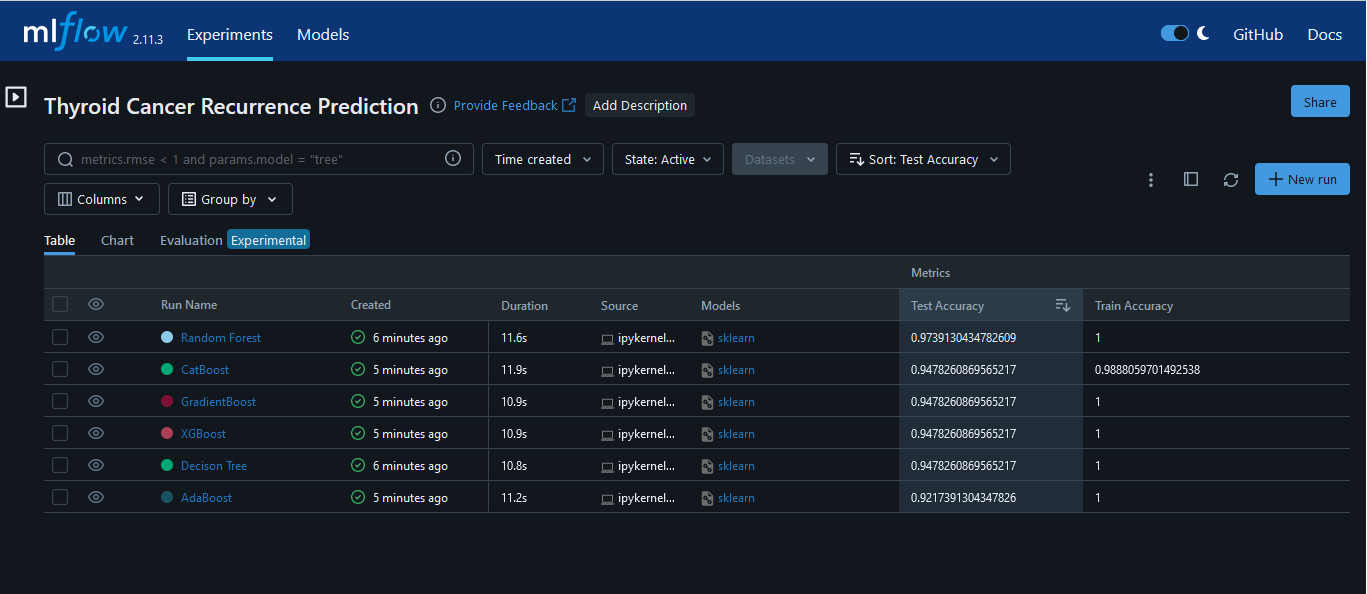](https://dagshub.com/SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction.mlflow/#/experiments/0?viewStateShareKey=f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca)